https://ngsolve.org/docu/latest/i-tutorials/unit-4.1-geom2d/geom2d.html

*note*: bug for rectangle sharing the same edge... it's best to define the geometry line by line:

https://gitlab.asc.tuwien.ac.at/jschoeberl/ngsolve-docu/wikis/ngpy-geom2d


Source code:

        netgen/libsrc/geom2d/python_geom2d.cpp
        
https://github.com/NGSolve/netgen/blob/95efdd212d6bba40349f7352fdc1066acc4b1318/libsrc/geom2d/python_geom2d.cpp      

In [3]:
from netgen.geom2d import SplineGeometry
import matplotlib.pylab as plt

In [4]:
# Dimensions
domain_width, domain_height = 1, 2
house_width = .3
insulation_depth, insulation_thickness = .2, .1

# element size:
maxh_small = .02
maxh_large = .2

### Define the geometry

In [5]:
geo = SplineGeometry()

# Points
# note: `AppendPoint` assigns the point id (integer) to the variable

top_left = geo.AppendPoint (-domain_width, 0)
top_right = geo.AppendPoint (house_width, 0)
bottom_left = geo.AppendPoint (-domain_width, -domain_height)
bottom_right = geo.AppendPoint (house_width, -domain_height)

origin = geo.AppendPoint (.0, .0)
A = geo.AppendPoint (0, -insulation_depth)
B = geo.AppendPoint (insulation_thickness, -insulation_depth)
C = geo.AppendPoint (insulation_thickness, -0)

In [6]:
# Segments:
# `bc`: boundary condition identifier
# "As default, the domain is left of the segment. "
# "The lines are oriented such that the domain is
#  on the left side when going from the first point
#  to the second point of the line."
#  i.e. sens trigo

geo.Append(["line", top_right, C], leftdomain=1, rightdomain=0, maxh=maxh_small)#, bc='hello', maxh=.4)
geo.Append(["line", origin, top_left], leftdomain=1, rightdomain=0)#, bc='hello2', maxh=.1)
geo.Append(["line", bottom_left, top_left], leftdomain=0, rightdomain=1)#, bc='hello2', maxh=.1)
geo.Append(["line", bottom_right, top_right], leftdomain=1, rightdomain=0)#, bc='hello2', maxh=.1)
geo.Append(["line", bottom_left, bottom_right], leftdomain=1, rightdomain=0)#, bc='hello2', maxh=.1)

geo.Append(["line", C, origin],    leftdomain=2, rightdomain=0, maxh=maxh_small)#, bc='hello2', maxh=.01)

geo.Append(["line", A, origin], leftdomain=1, rightdomain=2)#, bc='hello2', maxh=.1)
geo.Append(["line", A, B], leftdomain=2, rightdomain=1, maxh=maxh_small)#, bc='hello2', maxh=.1)
geo.Append(["line", B, C], leftdomain=2, rightdomain=1, maxh=maxh_small)#, bc='hello2', maxh=.1)

geo.SetMaterial(2, "insulation")
geo.SetMaterial(1, "soil")

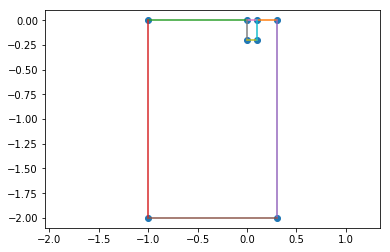

In [7]:
# Plot
plt.plot( geo.PointData()[0], geo.PointData()[1], 'o' )

xlim, ylim, x_points, y_points = geo.PlotData()
for xP, yP in zip(x_points, y_points):
    plt.plot( xP, yP, '-' )
    
plt.axis('equal');

### Mesh

In [8]:
# Mesh
mesh = geo.GenerateMesh(maxh=maxh_large)

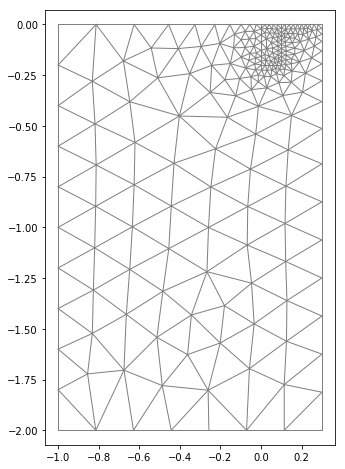

In [9]:
# Plot the mesh

# build list of unique edges
segments = set()
for el in mesh.Elements2D():
    a, b, c = sorted( [ p.nr for p in el.points ] )    
    segments.update([ (a, b), (b, c), (a, c) ]  )

# edges coords
mesh_points =  [(p[0], p[1]) for p in mesh.Points()]
x_coords, y_coords = [], []
for a, b in segments:
    xa, ya = mesh_points[a-1]
    xb, yb = mesh_points[b-1]
    x_coords.append([xa, xb])
    y_coords.append([ya, yb])
    
# Look for bounding box    
x_coords_flatten = [u for ab in x_coords for u in ab]
y_coords_flatten = [u for ab in y_coords for u in ab]
mesh_width = max(x_coords_flatten) - min(x_coords_flatten)
mesh_height = max(y_coords_flatten) - min(y_coords_flatten)

scale = 8/mesh_height

plt.figure(figsize=(scale*mesh_width, scale*mesh_height))
plt.plot(list( zip(*x_coords) ), list( zip(*y_coords) ), 'grey', linewidth=1)
plt.axis('equal');

In [10]:
import ngsolve

In [11]:
mesh_ng = ngsolve.Mesh(mesh)

In [13]:
mesh_ng.GetBoundaries()

('default',
 'default',
 'default',
 'default',
 'default',
 'default',
 'default',
 'default',
 'default')

In [14]:
mesh_ng.GetMaterials()

('soil', 'insulation')

In [17]:
soil = mesh_ng.Materials('soil')

In [18]:
mesh.GetMaterial('soil')

TypeError: GetMaterial(): incompatible function arguments. The following argument types are supported:
    1. (self: netgen.libngpy._meshing.Mesh, arg0: int) -> str

Invoked with: <netgen.libngpy._meshing.Mesh object at 0x7f5402d94848>, 'soil'

In [19]:
help(mesh)

Help on Mesh in module netgen.libngpy._meshing object:

class Mesh(pybind11_builtins.pybind11_object)
 |  Method resolution order:
 |      Mesh
 |      pybind11_builtins.pybind11_object
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  Add(...)
 |      Add(*args, **kwargs)
 |      Overloaded function.
 |      
 |      1. Add(self: netgen.libngpy._meshing.Mesh, arg0: netgen.libngpy._meshing.MeshPoint) -> netgen.libngpy._meshing.PointId
 |      
 |      2. Add(self: netgen.libngpy._meshing.Mesh, arg0: netgen.libngpy._meshing.Element3D) -> netgen.libngpy._meshing.ElementId3D
 |      
 |      3. Add(self: netgen.libngpy._meshing.Mesh, arg0: netgen.libngpy._meshing.Element2D) -> netgen.libngpy._meshing.ElementId2D
 |      
 |      4. Add(self: netgen.libngpy._meshing.Mesh, arg0: netgen.libngpy._meshing.Element1D) -> netgen.libngpy._meshing.ElementId1D
 |      
 |      5. Add(self: netgen.libngpy._meshing.Mesh, arg0: netgen.libngpy._meshing.Element0D) -> None
 |      
 |      6

In [21]:
ngsolve.x + ngsolve.y